# ECE 537 Final Project 
## Predict Diamond Price with Data mining techniques and concepts

## Part 1. Data importing and Data pre-procession

In [59]:
## import pandas and numpy module to import and pre-processing the original data from web
import pandas as pd 
import numpy as np
##import data from csv file
dm = pd.read_csv("Diamond Dataset.csv")
dm.head(5)

,Shape,Carat,Color,Clarity,Cut,Depth,Table,Symmetry,Cert,Price
0,Asscher,1.41,F,VVS1,Excellent,68.1,66.0,Very Good,GIA,9668
1,Asscher,1.18,I,VS1,Excellent,68.4,63.0,Excellent,GIA,4408
2,Asscher,1.83,I,VVS2,Excellent,66.6,61.0,Excellent,GIA,8220
3,Asscher,2.32,F,VVS2,Excellent,67.8,63.0,Excellent,GIA,22106
4,Asscher,1.01,I,VVS1,Excellent,70.5,67.0,Very Good,GIA,2901


In [60]:
dm.describe()

,Carat,Depth,Table,Price
count,10457.000000,10444.000000,10443.000000,10457.000000
mean,1.438875,63.990857,61.349229,12352.944630
std,0.874043,4.831526,5.268407,26615.754012
min,0.180000,22.600000,1.000000,103.000000
25%,0.910000,61.100000,58.000000,3133.000000
50%,1.200000,62.700000,60.000000,6199.000000
75%,1.730000,67.800000,64.000000,12794.000000
max,14.730000,90.600000,89.000000,747522.000000


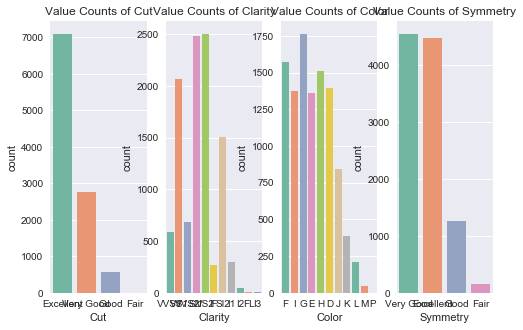

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
features = ['Cut','Clarity','Color','Symmetry']

plt.figure(figsize=(10,5))
for i in range(len(features)):
    plt.subplot(1,5,i+1)
    sns.countplot(dm[features[i]], palette='Set2');
    plt.title('Value Counts of {}'.format(features[i]))
    
plt.savefig("output.png")

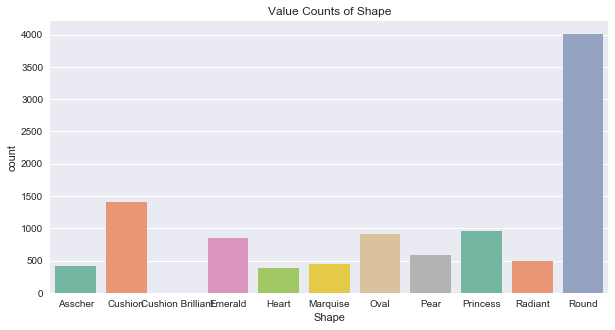

In [62]:
plt.figure(figsize=(10,5))
sns.countplot(dm['Shape'], palette='Set2');
plt.title('Value Counts of {}'.format('Shape'))
plt.savefig("shape.png")

In [65]:
print(dm['Cert'].value_counts().sort_values(ascending=False).head(10))
dm['Cert'] = ['GIA' if x == 'GIA' else 'Other' for x in dm['Cert']]

GIA            10442
Uncertified       12
None               2
Other Labs         1
Name: Cert, dtype: int64


In [66]:
print( 'After Combine the Cert')
print(dm['Cert'].value_counts().sort_values(ascending=False))

After Combine the Cert
GIA      10442
Other       15
Name: Cert, dtype: int64


## Numerical Nominal data 

In [67]:
# Decide which categorical variables you want to use in model
for col_name in dm.columns:
    if dm[col_name].dtypes == 'object':
        unique_cat = len(dm[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'Shape' has 11 unique categories
Feature 'Color' has 11 unique categories
Feature 'Clarity' has 11 unique categories
Feature 'Cut' has 5 unique categories
Feature 'Symmetry' has 5 unique categories
Feature 'Cert' has 2 unique categories


In [68]:
# Function to dummy all the categorical variables used for modeling
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [69]:
todummy_list = ['Shape']
dm = dummy_df(dm, todummy_list)
print(dm.head())

   Carat Color Clarity        Cut  Depth  Table   Symmetry Cert  Price  \
0   1.41     F    VVS1  Excellent   68.1   66.0  Very Good  GIA   9668   
1   1.18     I     VS1  Excellent   68.4   63.0  Excellent  GIA   4408   
2   1.83     I    VVS2  Excellent   66.6   61.0  Excellent  GIA   8220   
3   2.32     F    VVS2  Excellent   67.8   63.0  Excellent  GIA  22106   
4   1.01     I    VVS1  Excellent   70.5   67.0  Very Good  GIA   2901   

   Shape_Asscher  Shape_Cushion  Shape_Cushion Brilliant  Shape_Emerald  \
0              1              0                        0              0   
1              1              0                        0              0   
2              1              0                        0              0   
3              1              0                        0              0   
4              1              0                        0              0   

   Shape_Heart  Shape_Marquise  Shape_Oval  Shape_Pear  Shape_Princess  \
0            0               0

In [70]:
dm.loc[dm.Color == 'P','Color'] = 0
dm.loc[dm.Color == 'M','Color'] = 1
dm.loc[dm.Color == 'L','Color'] = 2	
dm.loc[dm.Color == 'K','Color'] = 3
dm.loc[dm.Color == 'J','Color'] = 4
dm.loc[dm.Color == 'I','Color'] = 5
dm.loc[dm.Color == 'H','Color'] = 6
dm.loc[dm.Color == 'G','Color'] = 7
dm.loc[dm.Color == 'F','Color'] = 8
dm.loc[dm.Color == 'E','Color'] = 9
dm.loc[dm.Color == 'D','Color'] = 10
dm.loc[dm.Clarity == 'I3','Clarity'] = 0
dm.loc[dm.Clarity == 'I2','Clarity'] = 1
dm.loc[dm.Clarity == 'I1','Clarity'] = 2
dm.loc[dm.Clarity == 'SI2','Clarity'] = 3
dm.loc[dm.Clarity == 'SI1','Clarity'] = 4
dm.loc[dm.Clarity == 'VS2','Clarity'] = 5
dm.loc[dm.Clarity == 'VS1','Clarity'] = 6
dm.loc[dm.Clarity == 'VVS2','Clarity'] = 7
dm.loc[dm.Clarity == 'VVS1','Clarity'] = 8
dm.loc[dm.Clarity == 'IF','Clarity'] = 9
dm.loc[dm.Clarity == 'FL','Clarity'] = 10
dm.loc[dm.Cut == 'Fair','Cut'] = 0
dm.loc[dm.Cut == 'Good','Cut'] = 1
dm.loc[dm.Cut == 'Very Good','Cut'] = 2
dm.loc[dm.Cut == 'Excellent','Cut'] = 3
dm.loc[dm.Symmetry == 'Fair','Symmetry'] = 0
dm.loc[dm.Symmetry == 'Good','Symmetry'] = 1
dm.loc[dm.Symmetry == 'Very Good','Symmetry'] = 2
dm.loc[dm.Symmetry == 'Excellent','Symmetry'] = 3
dm['Cert'] = ['GIA' if x == 'GIA' else 'Other' for x in dm['Cert']]


dm.loc[dm.Cert == 'Other','Cert'] = 0
dm.loc[dm.Cert == 'GIA','Cert'] = 1


cols = list(dm.columns.values)
cols.pop(cols.index('Price'))
dm = dm[cols + ['Price']]

dm.head()

,Carat,Color,Clarity,Cut,Depth,Table,Symmetry,Cert,Shape_Asscher,Shape_Cushion,Shape_Cushion Brilliant,Shape_Emerald,Shape_Heart,Shape_Marquise,Shape_Oval,Shape_Pear,Shape_Princess,Shape_Radiant,Shape_Round,Price
0,1.41,8,8,3,68.1,66.0,2,1,1,0,0,0,0,0,0,0,0,0,0,9668
1,1.18,5,6,3,68.4,63.0,3,1,1,0,0,0,0,0,0,0,0,0,0,4408
2,1.83,5,7,3,66.6,61.0,3,1,1,0,0,0,0,0,0,0,0,0,0,8220
3,2.32,8,7,3,67.8,63.0,3,1,1,0,0,0,0,0,0,0,0,0,0,22106
4,1.01,5,8,3,70.5,67.0,2,1,1,0,0,0,0,0,0,0,0,0,0,2901


## Handling the missing data

In [71]:
dm.isnull().sum().sort_values(ascending = False).head()
dm.isnull().mean().sort_values(ascending = False).head()

Cut         0.001434
Table       0.001339
Depth       0.001243
Symmetry    0.001148
Price       0.000000
dtype: float64

In [72]:
#find out the missing data and replace them with the median of this catagery
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(dm)
dm = pd.DataFrame(data=imp.transform(dm) , columns=dm.columns)


In [73]:
dm.isnull().sum().sort_values(ascending = False).head()

Price          0
Shape_Round    0
Color          0
Clarity        0
Cut            0
dtype: int64

## Handling the outlier data

In [74]:
##Specrate the data set based on the price and others
X = dm.drop(['Price'],1)
Y = dm['Price']


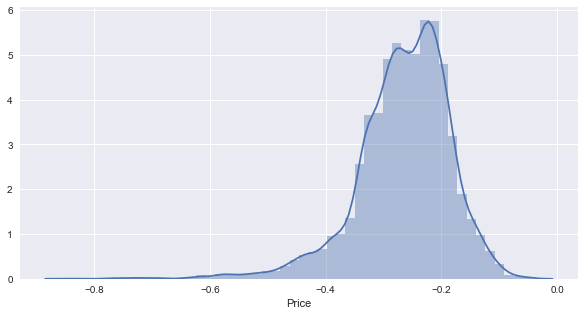

In [93]:
#Since the price value is way larger than the carat and dimension value so I choose 
#log(price) to ensure they are in the same scale.

dm['log_price'] = np.log(Y)
dm['Price'] = dm['log_price']
Y = dm['Price']
plt.figure(figsize=(10,5))
sns.distplot(dm.Price);

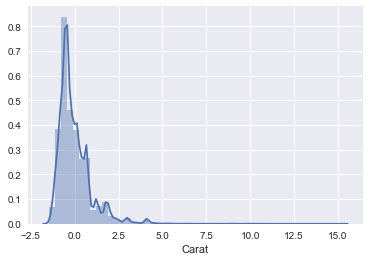

0   -0.033037
1   -0.296181
2    0.447489
3    1.008102
4   -0.490680
Name: Carat, dtype: float64

In [86]:
def Z_score(data):
    dm[data] = (dm[data] - dm[data].mean())/dm[data].std()
    return dm[data]
dm['Depth'] = Z_score('Depth')
dm['Table'] = Z_score('Table')
dm['Carat'] = Z_score('Carat')

import seaborn as sns
sns.set(color_codes = True)
sns.distplot(dm['Carat'])
plt.show()
dm['Carat'].head()

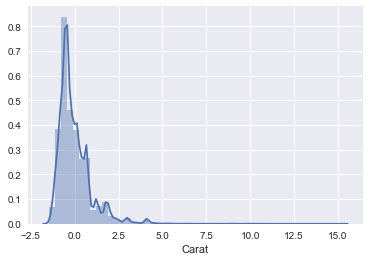

In [88]:
#preprocessing the data to ensure the data in the same scale
from sklearn import preprocessing
dm['Carat_scaled'] = preprocessing.scale(dm['Carat'])
dm['Carat_scaled'].head()
sns.distplot(dm['Carat_scaled'])
plt.show()

In [89]:

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

def draw_scatter(data):
    
    X_draw = X[data]
    Y_draw = Y
    plt.scatter(X_draw,Y_draw, color = 'blue', alpha = 0.5)
    plt.show()

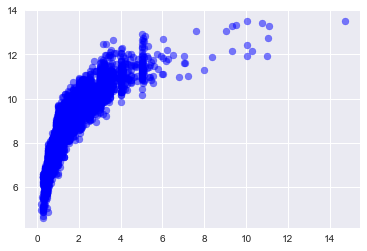

(10457, 19)

In [90]:
draw_scatter("Carat")
X.shape

In [23]:
# Handle the outlier by box plot method
def find_outlier(data):
    Q1 = X[data].quantile(0.25)
    Q3 = X[data].quantile(0.75)
    IQR = 1.5*(Q3-Q1)
    upper_limit = Q3+IQR
    lower_limit = Q1-IQR
    outlier = X[(X[data] < upper_limit) & (X[data] > lower_limit)]

    return outlier


In [24]:
X = find_outlier('Carat')
Y = Y[X.index]
X.shape

(9764, 19)

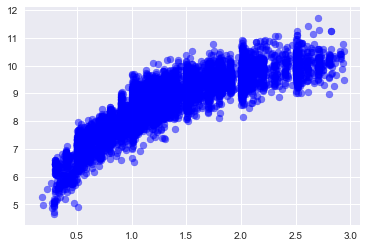

In [25]:

draw_scatter("Carat")

## Split the data set to train part and test part

Using train_test_split function of Scikit-learn 

In [26]:
from sklearn.cross_validation import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0) 

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [46]:
print("X_train shape is", X_train.shape[0],"by", X_train.shape[1])
print("\ny_train shape is", y_train.shape[0])
print("\nX_test shape is", X_test.shape[0],"by", X_test.shape[1])
print("\ny_test shape is", y_test.shape[0])

X_train shape is 7811 by 3

y_train shape is 7811

X_test shape is 1953 by 3

y_test shape is 1953


In [28]:
y_train.head()

942     8.219865
4320    8.357494
3071    8.212568
2483    9.326255
3879    8.572817
Name: Price, dtype: float64

## Build Multiple Linear Regressioner

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

features = ['Carat','Depth','Table']
X_train = X_train[features]
X_test = X_test[features]
regressor = LinearRegression()
regressor.fit(X_train,y_train)

#predict with trained model
predicted_y_test = regressor.predict(X_test)


In [56]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits=5, random_state=None, shuffle=False)
cv_results = cross_val_score(regressor, X_train, y_train, cv=kfold, n_jobs=-1) 
print("Result Mean is", cv_results.mean())
print("Result standard deviation is", cv_results.std())

Result Mean is 0.765555433919
Result standard deviation is 0.0116410700926


In [57]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

predicted_y_test = regressor.predict(X_test)

print("\nMean Square Error is", mean_squared_error(y_test, predicted_y_test))
print("\nR2 Score is", r2_score(y_test, predicted_y_test))
print("\nFeatures' Corresponding Coefficients:\n", np.var(X_train,ddof = 1))
print("\nMultiple Linear Regression coefficients are",regressor.coef_)


Mean Square Error is 0.216480792216

R2 Score is 0.750350196702

Features' Corresponding Coefficients:
 Carat     0.282899
Depth    24.038944
Table    27.672272
dtype: float64

Multiple Linear Regression coefficients are [ 1.57598715 -0.01131533 -0.0048577 ]


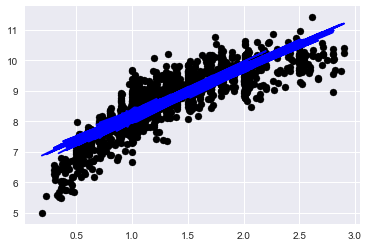

In [38]:
plt.scatter(X_test['Carat'], y_test,  color='black')
plt.plot(X_test['Carat'], predicted_y_test, color='blue')